In [25]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 

Read the sdss and gaia catalogs 

In [4]:
colnames = ['calib_fla', 'ra', 'dec', 'raRMS', 'decRMS', 'nEpochs', 'AR_val', 
                'u_Nobs', 'u_mMed', 'u_mMean', 'u_mErr', 'u_rms_scatt', 'u_chi2',
                'g_Nobs', 'g_mMed', 'g_mMean', 'g_mErr', 'g_rms_scatt', 'g_chi2',
                'r_Nobs', 'r_mMed', 'r_mMean', 'r_mErr', 'r_rms_scatt', 'r_chi2',
                'i_Nobs', 'i_mMed', 'i_mMean', 'i_mErr', 'i_rms_scatt', 'i_chi2',
                'z_Nobs', 'z_mMed', 'z_mMean', 'z_mErr', 'z_rms_scatt', 'z_chi2']

sdss = Table.read('stripe82calibStars_v2.6.dat', format='ascii', names=colnames)

In [11]:
colnames = ['ra', 'dec', 'nObs', 'Gmag', 'flux', 'fluxErr']
gaia = Table.read('Stripe82_GaiaDR1_small.dat', format='ascii', names=colnames)

Match gaia to sdss, since here sdss is much larger 

In [18]:
sdss_coords = SkyCoord(ra = sdss['ra']*u.degree, dec= sdss['dec']*u.degree) 
gaia_coords = SkyCoord(ra = gaia['ra']*u.degree, dec= gaia['dec']*u.degree) 

# this is matching gaia to sdss, so that indices are into sdss catalog
# makes sense in this case since the sdss catalog is bigger than gaia
idx, d2d, d3d = gaia_coords.match_to_catalog_sky(sdss_coords)  

# object separation is an object with units, 
# I add that as a column so that one can 
# select based on separation to the nearest matching object
gaia_sdss = hstack([gaia, sdss[idx]], table_names = ['gaia', 'sdss'])
gaia_sdss['sep_2d_arcsec'] = d2d.arcsec

# since it's matching gaia to sdss,
# the resulting catalog has the same length 
# as gaia ... 

Select good matches

In [23]:
# I would call good match to be within a certain limit 
# there is no built-in boundary - match_to_catalog_sky()
# will find the nearest match, regardless if it's an arcsecond
# or five degrees to the nearest one.


# gaia sources that have a good sdss match 
print(len(gaia_sdss))
gaia_matched = gaia_sdss[gaia_sdss['sep_2d_arcsec'] < 1]
print(len(gaia_matched))

17309
11727


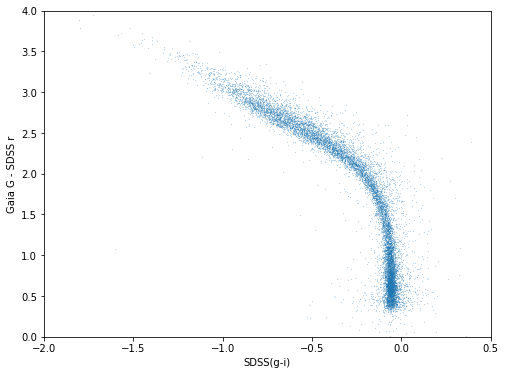

In [37]:
# Plot a (gaia - r)  vs (g-i)  for photometric transformation
%matplotlib inline
Gr = gaia_matched['Gmag'] - gaia_matched['r_mMed']
gi = gaia_matched['g_mMed'] - gaia_matched['i_mMed']
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(Gr, gi, s=0.01)
ax.set_xlim(-2,0.5)
ax.set_ylim(0,4)
ax.set_xlabel('SDSS(g-i)')
ax.set_ylabel('Gaia G - SDSS r')